## Machine Learning Lab 1

## Assignment 1 (Deadline : 15/10/2020 11:59PM)

### Q1 : Loss Functions (30 points)

Implement the following loss functions using numpy (each function should take two numpy arrays as arguments and return the value of the loss):

1. Huber Loss (10 points)
2. Hinge Loss (10 points)
3. Cross Entropy Loss (10 points)

In [6]:
import numpy as np
x = np.array(list(round(i,2) for i in np.arange(-5, 5, 1)))
y_true = np.array([26.43419249, 15.92506381,  3.62129199,  4.14318826, -3.70401893,
        0.70660113,  0.75914698,  4.46490062,  7.24381726, 12.70004881])
y_pred = np.array([25,16,9,4,1,0,1,4,9,16])
delta = 1

def huber_loss(y_true, y_pred, delta):
    error = y_true - y_pred
    n = y_true.shape[0]
    flag = np.abs(error) < delta
    squared_loss = np.square(error)/2
    linear_loss = delta * np.abs(error) - np.square(delta)/2
    return np.sum( np.where(flag, squared_loss, linear_loss) ) /  n
    ...

huber_loss(y_true, y_pred, delta)

1.4472826475505163

In [24]:
import numpy as np
x = np.array(list(round(i,2) for i in np.arange(-5, 5, 1)))
y_true = np.array([26.43419249, 15.92506381,  3.62129199,  4.14318826, -3.70401893,
        0.70660113,  0.75914698,  4.46490062,  7.24381726, 12.70004881])
y_pred = np.array([25,16,9,4,1,0,1,4,9,16])

y_true = np.array([1,-1,-1,1,1])
y_pred = np.array([-0.3,-0.5,6.6,0.2,0.9])

def hinge_loss(y_true,y_pred):
    n = y_true.shape[0]
    error = 1 - y_true * y_pred
    return np.sum( np.maximum(np.zeros(n), error) ) /  n
    ...

hinge_loss(y_true,y_pred)

2.06

In [31]:
import numpy as np
x = [0, 1, 0, 0, 1, 0, 0, 1, 1, 1]
y_true = np.array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1])
y_pred = np.array([0.2, 0.8, 0.4, 0.6, 0.4, 0.3, 0.7, 0.7, 0.1, 0.8])

y_pred = np.array( [0.2,0.5,0,0.7,0.05])
y_true = np.array([1,0,0,1,1])
def cross_entropy_loss(y_true, y_pred):
    n = y_true.shape[0]
    return -1 * np.sum( ( y_true * np.log(y_pred, out=np.zeros_like(y_pred), where=(y_pred!=0)) + ( 1 - y_true) * np.log(1 - y_pred, out=np.zeros_like(1 - y_pred), where=(1 - y_pred!=0)) ) ) / n
    ...
    
cross_entropy_loss(y_true, y_pred)

1.1309984620973537

### Q2 : Visualizing Taylor Series (10 points)

Taylor series for a function $f(x)$ about $x=a$ is :
$$\begin{align*}f\left( x \right) & = \sum\limits_{n = 0}^\infty {\frac{{{f^{\left( n \right)}}\left( a \right)}}{{n!}}{{\left( {x - a} \right)}^n}} \\ & = f\left( a \right) + f'\left( a \right)\left( {x - a} \right) + \frac{{f''\left( a \right)}}{{2!}}{\left( {x - a} \right)^2} + \frac{{f'''\left( a \right)}}{{3!}}{\left( {x - a} \right)^3} + \cdots \end{align*}$$

Visualize the 1st, 2nd and 4th order Taylor series approximation for cos(x) at $x=0$


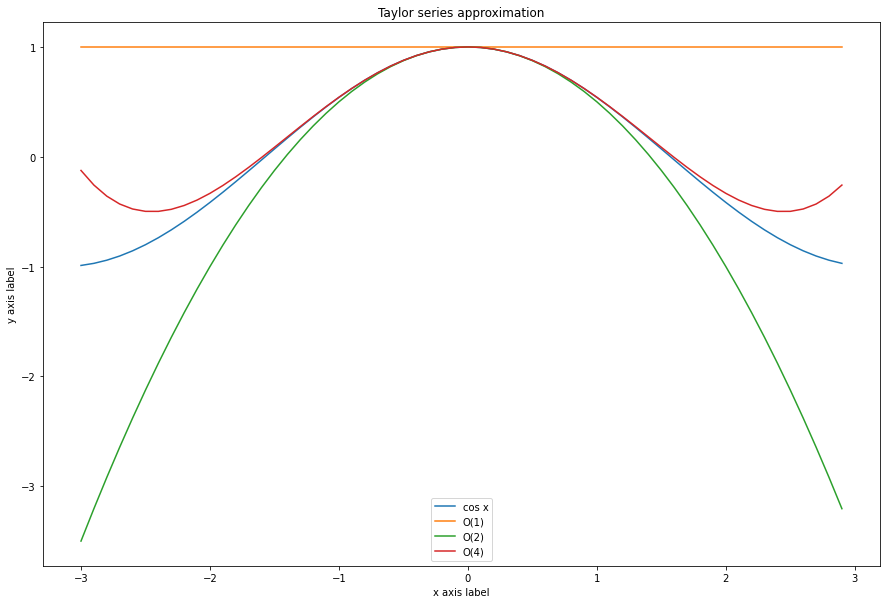

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-3, 3, 0.1)
y1 = np.array([ 1 for i in range(0,x.shape[0]) ])
y2 = 1 - np.square(x)/2
y4 = 1 - np.square(x)/2 + np.power(x,4)/24
plt.figure(figsize=(15, 10))
plt.plot(x, np.cos(x)) 
plt.plot(x, y1) 
plt.plot(x, y2) 
plt.plot(x, y4) 
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Taylor series approximation')
plt.legend(['cos x','O(1)','O(2)', 'O(4)'])
plt.show()

### Q3 : Visualising Loss surface in weight space (20 points)

Consider a loss function defined in terms of weights w1 and w2 as : $$ J = \frac{1}{2}[(w_1 - w_2)^2 + (25 - w_1)^2]$$

1. Plot the loss surface in the weight space $w_1$ and $w_2$  (10 points)
2. At any three points, plot the direction of the gradient at that point (10 points)

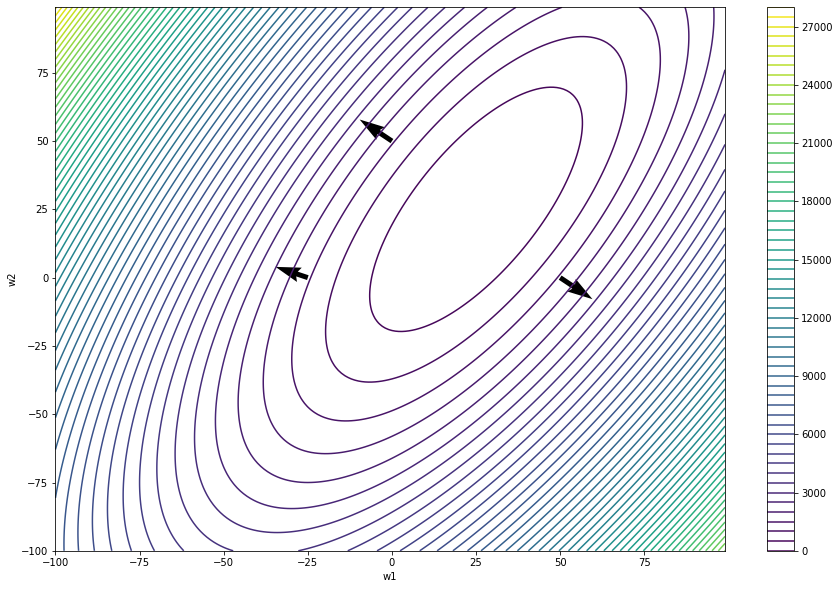

In [35]:
import numpy as np
import matplotlib.pyplot as plt
w1 = np.arange(-100,100,1)
w2 = np.arange(-100,100,1)
X, Y = np.meshgrid(w1, w2)
J = ( np.square(X - Y) + np.square(25 - X) ) / 2
fig, ax = plt.subplots(figsize=(15,10))
x1 = np.array([50,-25,0])
y1 = np.array([0,0,50])
u = 2 * x1 - y1 - 25
v = y1 - x1
ax.contour(X,Y,J,levels=60)
fig.colorbar(cp)
ax.quiver(x1, y1, u, v, units='xy')
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()